## Connected Component Labelling

### Imports

In [1]:
from PIL import Image
import numpy as np
import cv2

### Get Image

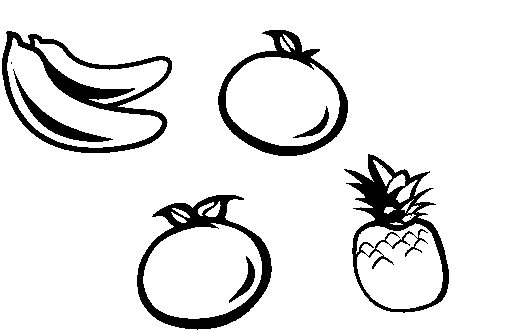

In [2]:
im = cv2.imread("fruits.png", 2) #Also can be done with im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
width, height = im.shape

im[im < 128] = 0
im[im > 128] = 255
Image.fromarray(im, 'L')

In [3]:
""" 
img = Image.open('fruits.png').convert('L')
width, height = img.size
img = img.point(lambda i: 0 if i < 128 else 255)
array = np.array(img.getdata())
array = np.reshape(array, (width,height))
test = Image.fromarray(array, 'L')
"""

" \nimg = Image.open('fruits.png').convert('L')\nwidth, height = img.size\nimg = img.point(lambda i: 0 if i < 128 else 255)\narray = np.array(img.getdata())\narray = np.reshape(array, (width,height))\ntest = Image.fromarray(array, 'L')\n"

### Dict to keep values for preference

In [4]:
pref   = dict()
matrix = np.ones((width,height), np.uint8) * 255 # Suspicion on data type causing unwanted behaviour when scaling
array  = im
label  = 1

In [5]:
for y in range(height):
    for x in range(width):
        if array[x][y] == 255:
            # Assign True for code logic
            matrix[x][y] = True
            continue
        left  = matrix[x-1][y] if (x-1) > 0 else True
        up    = matrix[x][y-1] if (y-1) > 0 else True
        
        # Possibility 1: Left and Up don't exist
        if left and up:
            matrix[x][y] = label
            label += 1
            continue
            
        # Possibility 2: Up does not exist but Left does
        elif up:
            if type(left) == type(True): 
                matrix[x][y] = label
                label        += 1
                continue
            else:
                matrix[x][y] = left
                continue
                
        # Possibility 3: Left does not exist but Up does        
        elif left:
            if type(up) == type(True):
                matrix[x][y] = label
                label       += 1
                continue
            else:
                matrix[x][y] = up
                continue
                
        # Possibility 4: Both Up and Left exist
        else:
            if left < up:
                matrix[x][y] = left
                pref[up]     = left
            else:
                matrix[x][y] = up
                pref[left]   = up

### Before removing redundunt blocks, we could also update the dictionary preferences to point to their ultimate destination. Consider the case when 2 points to 1 and 5 points to 2. We would clean the dictionary to have 5 point to 1 directly.

In [6]:
# Optional objective for further improvement.

### Removing redundent blocks

In [7]:
for y in range(height):
    for x in range(width):
        possiblekey  = matrix[x][y]
        if possiblekey == True:
            possiblekey = 255 # White pixels. We are assuming labels never go upto 255. We will have problems if that were the case
        matrix[x][y] = possiblekey if possiblekey not in pref.keys() else pref[possiblekey]

In [8]:
#matrix = (matrix * 25) % 256 My idea was to
matrix

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [9]:
#matrix = np.reshape(matrix, (width*height,))
#listify_nparray = np.array(matrix).tolist()
#cc = Image.new("L", img.size)
#cc.putdata(listify_nparray)
#cc

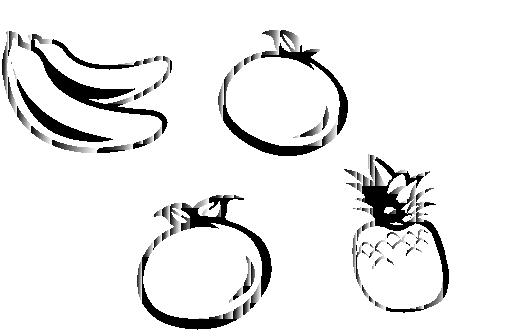

In [10]:
newimg = Image.fromarray(matrix, 'L')
newimg